# ADVANCED COMPUTER VISION
## Assignment 1
### Ishang Kansal | E22CSEU0320


Scaled Triangle coordinates:
[[0.  0.  1. ]
 [3.  0.  1. ]
 [1.5 3.  1. ]]


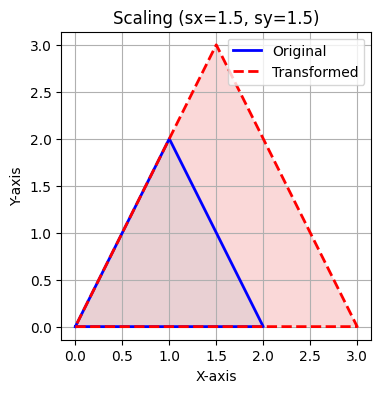


Rotated Triangle coordinates:
[[ 0.0000000e+00  0.0000000e+00  1.0000000e+00]
 [ 1.2246468e-16 -2.0000000e+00  1.0000000e+00]
 [ 2.0000000e+00 -1.0000000e+00  1.0000000e+00]]


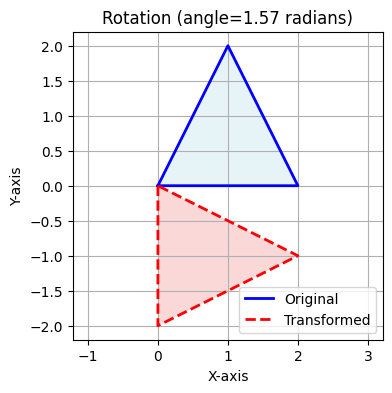


Reflected Triangle coordinates:
[[ 0  0  1]
 [ 2  0  1]
 [ 1 -2  1]]


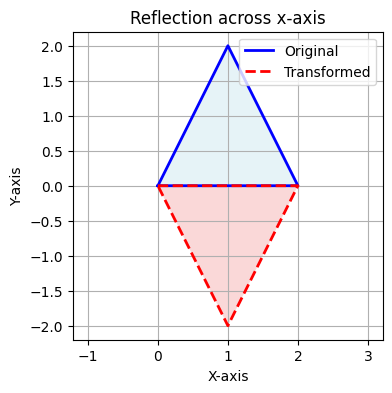


Sheared Triangle coordinates:
[[0.  0.  1. ]
 [2.  1.  1. ]
 [1.  2.5 1. ]]


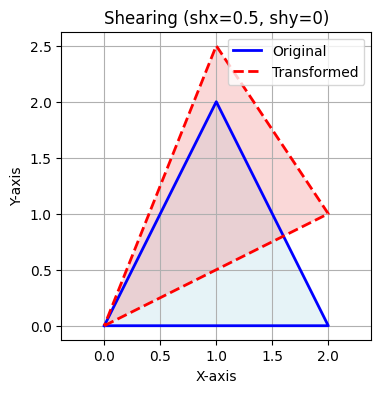

array([[0. , 0. , 1. ],
       [2. , 1. , 1. ],
       [1. , 2.5, 1. ]])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def scale2D(points, sx, sy):
    scale_matrix = np.array([[sx, 0, 0],
                            [0, sy, 0],
                            [0, 0, 1]])
    scaled_points = np.dot(points, scale_matrix)
    return scaled_points

def rotate2D(points, angle):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle), 0],
                               [np.sin(angle), np.cos(angle), 0],
                               [0, 0, 1]])
    rotated_points = np.dot(points, rotation_matrix)
    return rotated_points

def reflect2D(points, axis):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0],
                                    [0, -1, 0],
                                    [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0],
                                    [0, 1, 0],
                                    [0, 0, 1]])
    else:
        print("Invalid axis")
        return
    reflected_points = np.dot(points, reflection_matrix)
    return reflected_points

def shear2D(points, shx, shy):
    shear_matrix = np.array([[1, shx, 0],
                            [shy, 1, 0],
                            [0, 0, 1]])
    sheared_points = np.dot(points, shear_matrix)
    return sheared_points

def plot_transformation(original, transformed, title):
    plt.figure(figsize=(4, 4))

    original_plot = np.vstack([original, original[0]])
    transformed_plot = np.vstack([transformed, transformed[0]])

    plt.plot(original_plot[:, 0], original_plot[:, 1], 'b-', label='Original', linewidth=2)
    plt.fill(original_plot[:, 0], original_plot[:, 1], 'lightblue', alpha=0.3)

    plt.plot(transformed_plot[:, 0], transformed_plot[:, 1], 'r--', label='Transformed', linewidth=2)
    plt.fill(transformed_plot[:, 0], transformed_plot[:, 1], 'lightcoral', alpha=0.3)

    plt.grid(True)
    plt.axis('equal')
    plt.title(title)
    plt.legend()
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

    return transformed

points = np.array([[0, 0, 1],
                  [2, 0, 1],
                  [1, 2, 1]])

sx, sy = 1.5, 1.5
scaled_points = scale2D(points, sx, sy)
print("\nScaled Triangle coordinates:")
print(scaled_points)
plot_transformation(points, scaled_points, f'Scaling (sx={sx}, sy={sy})')

angle = np.pi/2
rotated_points = rotate2D(points, angle)
print("\nRotated Triangle coordinates:")
print(rotated_points)
plot_transformation(points, rotated_points, f'Rotation (angle={angle:.2f} radians)')

axis = 'x'
reflected_points = reflect2D(points, axis)
print("\nReflected Triangle coordinates:")
print(reflected_points)
plot_transformation(points, reflected_points, f'Reflection across {axis}-axis')

shx, shy = 0.5, 0
sheared_points = shear2D(points, shx, shy)
print("\nSheared Triangle coordinates:")
print(sheared_points)
plot_transformation(points, sheared_points, f'Shearing (shx={shx}, shy={shy})')

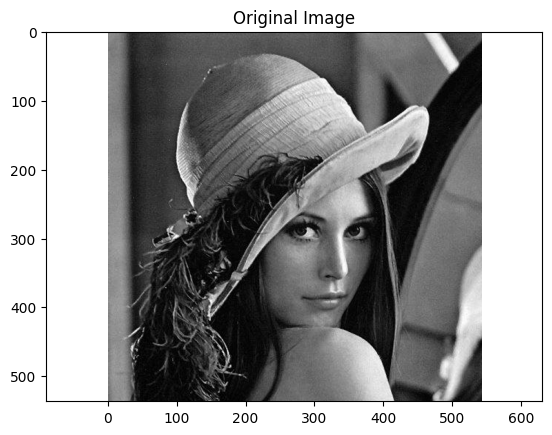

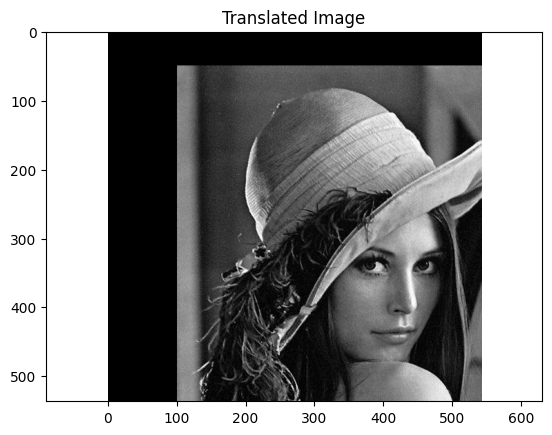

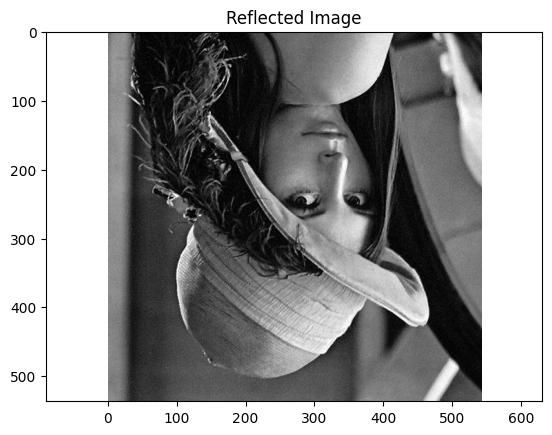

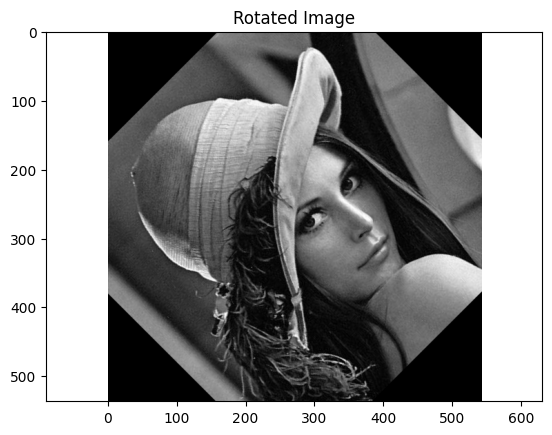

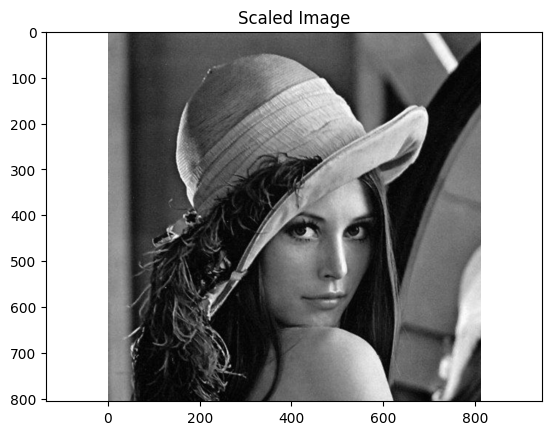

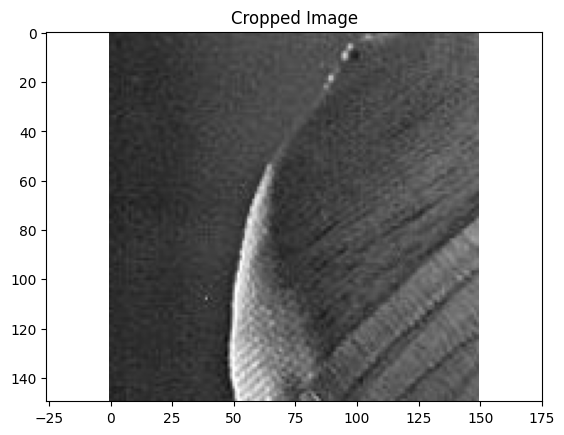

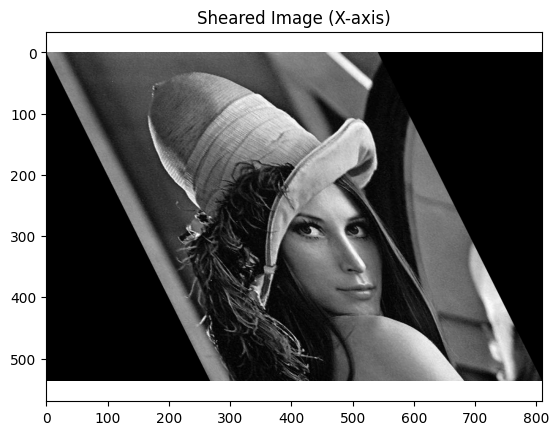

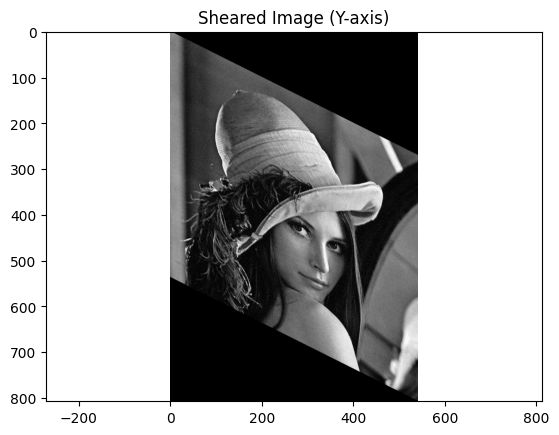

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def display_image(title, image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('equal')
    plt.show()


image = cv2.imread("pic.png")
display_image("Original Image", image)
height, width = image.shape[:2]

def translate_image(image, tx, ty):
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(image, M, (width, height))
    return translated

translated_image = translate_image(image, 100, 50)
display_image("Translated Image", translated_image)


def reflect_image(image):
    reflected = cv2.flip(image, 0)
    return reflected

reflected_image = reflect_image(image)
display_image("Reflected Image", reflected_image)


def rotate_image(image, angle):
    M = cv2.getRotationMatrix2D((width // 2, height // 2), angle, 1)
    rotated = cv2.warpAffine(image, M, (width, height))
    return rotated

rotated_image = rotate_image(image, 45)
display_image("Rotated Image", rotated_image)


def scale_image(image, fx, fy):
    scaled = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled

scaled_image = scale_image(image, 1.5, 1.5)
display_image("Scaled Image", scaled_image)


def crop_image(image, x_start, y_start, x_end, y_end):
    cropped = image[y_start:y_end, x_start:x_end]
    return cropped

cropped_image = crop_image(image, 50, 50, 200, 200)
display_image("Cropped Image", cropped_image)


def shear_image_x(image, shear_factor):
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_x = cv2.warpAffine(image, M, (width + int(shear_factor * height), height))
    return sheared_x

sheared_x_image = shear_image_x(image, 0.5)
display_image("Sheared Image (X-axis)", sheared_x_image)


def shear_image_y(image, shear_factor):
    M = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_y = cv2.warpAffine(image, M, (width, height + int(shear_factor * width)))
    return sheared_y

sheared_y_image = shear_image_y(image, 0.5)
display_image("Sheared Image (Y-axis)", sheared_y_image)
